In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df = pd.read_csv("../input/customer-detail/Mall_Customers.csv")
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


In [3]:
x = df.drop("Age",axis=1)
x

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40
...,...,...,...
195,196,120,79
196,197,126,28
197,198,126,74
198,199,137,18


In [4]:
y = df["Age"]
y

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split 
train_X, test_X, train_y, test_y = train_test_split(x,y, train_size=0.5, test_size=0.5, random_state=0)
test_X

,CustomerID,Annual Income (k$),Spending Score (1-100)
18,19,23,29
170,171,87,13
107,108,63,46
98,99,61,42
177,178,88,69
...,...,...,...
178,179,93,14
175,176,88,86
126,127,71,35
93,94,60,40


In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [7]:
from pandas.core.common import random_state
from sklearn.linear_model import LogisticRegression
ml = LogisticRegression(random_state =0)
ml.fit(train_X,train_y)

LogisticRegression(random_state=0)

In [8]:
y_pred = ml.predict( test_X)
print(y_pred )

[35 34 32 49 32 34 21 32 35 34 21 29 32 34 49 21 21 34 21 49 32 30 21 32
 21 29 32 32 32 49 35 49 34 32 35 32 32 35 49 32 34 49 35 32 32 21 35 49
 32 29 49 34 32 49 30 35 35 32 49 49 32 49 32 21 32 49 49 30 21 49 32 49
 32 49 34 49 32 35 21 29 32 21 34 32 49 49 35 49 34 32 21 35 32 49 32 34
 32 32 49 32]


Text(0.5, 1.0, 'Actual vs predicted')

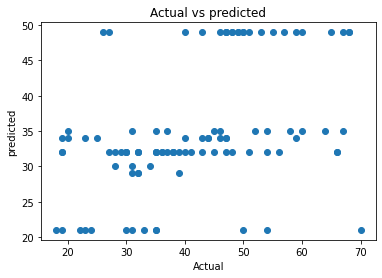

In [9]:
plt.scatter(test_y,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Actual vs predicted')

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred ,test_y)

0.06

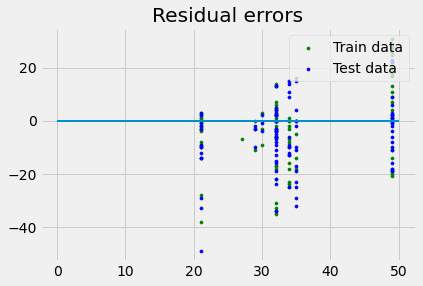

In [11]:
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(ml.predict(train_X), ml.predict(train_X) - train_y,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(ml.predict(test_X), ml.predict(test_X) - test_y,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()